In [120]:
import numpy as np
import pandas as pd
import math as mp
pd.options.display.float_format='{:,.20}'.format
np.set_printoptions(precision=15)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook


df=pd.read_csv('inerpolated.csv')

In [121]:
from astropy.constants import G
from astropy import constants as const
GM=const.GM_earth.value

In [122]:
df

,Epoch_Time_of_Clock,PRN,SV_Clock_Bias,SV_Clock_Drift,Crs,Del_n,M0,Cuc,e,Cus,sqrt_A,Toe,Cic,OMEGA,Cis,i0,Crc,omega,OMEGA_dot,I_dot
0,1509494400,2,0.00029236885408499997934,-9.549694368620000339e-12,-9.015625,4.6299999999999999347e-09,-4.1713860034699994372,-2.4100000000000000074e-07,0.017213431885400001103,3.1300000000000001019e-06,"5,153.6130027700000937","259,200.0",2.969999999999999728e-07,0.95305113685100006915,-5.279999999999999634e-07,0.94774000325599994099,305.59375,-1.9437012805800000237,-7.9500000000000000505e-09,2.0700000000000000896e-10
1,1509494401,2,0.00029236883847500003304,-9.549694368620000339e-12,-9.0127107131800006101,4.630101656360000729e-09,-4.1712396400499995863,-2.408877809400000299e-07,0.017213431839499998555,3.1301338378200000297e-06,"5,153.613002250000136","259,201.00000100003672",2.9693694649999999846e-07,0.95305112847499995343,-5.2790678787600000348e-07,0.94774000289799997798,305.59169568900000513,-1.9437012631599999146,-7.9501070823300004689e-09,2.0696548941599999718e-10
2,1509494402,2,0.0002923688228659999922,-9.549694368620000339e-12,-9.0097968354699986548,4.6302032946000005732e-09,-4.1710932768399997528,-2.4077557823000000719e-07,0.017213431793699999345,3.1302676324299998993e-06,"5,153.6130017300001782","259,202.00000300002284",2.9687391147500001966e-07,0.95305112010000003764,-5.278135938020000402e-07,0.94774000254099999285,305.58964217200002622,-1.9437012457400000276,-7.9502141398000007844e-09,2.069309891859999864e-10
3,1509494403,2,0.00029236880725800001943,-9.549694368620000339e-12,-9.0068833668499994616,4.6303049147399998673e-09,-4.1709469138499999374,-2.4066339186799998195e-07,0.017213431748000000004,3.1304013838400002051e-06,"5,153.6130011999994167","259,203.00000400000135",2.9681089492100002921e-07,0.95305111172399992192,-5.277204177739999605e-07,0.94774000218300002985,305.58758944999999585,-1.9437012283300001414,-7.9503211723899997698e-09,2.0689649930699999934e-10
4,1509494404,2,0.00029236879165099995213,-9.549694368620000339e-12,-9.0039703072800012507,4.6304065167800002657e-09,-4.1708005510700001395,-2.4055122185200000352e-07,0.017213431702200000795,3.1305350920500001001e-06,"5,153.6130006800003684","259,204.00000500000897",2.9674789683800002709e-07,0.95305110334800002825,-5.2762725979300000438e-07,0.94774000182600004472,305.58553752199998144,-1.9437012109200000332,-7.9504281801300009203e-09,2.0686201977999999395e-10
5,1509494405,2,0.00029236877604400004745,-9.549694368620000339e-12,-9.0010576567199986897,4.6305081007100003276e-09,-4.1706541885000003589,-2.4043906818000001533e-07,0.017213431656599997854,3.1306687570600000078e-06,"5,153.6130001499996069","259,205.0000070000242",2.9668491722399995676e-07,0.95305109497300000143,-5.2753411985400003049e-07,0.94774000146899994856,305.58348638900002925,-1.9437011935099997029,-7.9505351629999997e-09,2.0682755060299997676e-10
6,1509494406,2,0.00029236876043900000789,-9.549694368620000339e-12,-8.9981454151199997682,4.630609666549999626e-09,-4.1705078261400005957,-2.403269308500000138e-07,0.017213431610999998383,3.1308023788799999992e-06,"5,153.6129996299996492","259,206.00000800000271",2.9662195607599999809e-07,0.95305108659700010776,-5.2744099795699993295e-07,0.94774000111200007446,305.58143604899998991,-1.9437011761000000387,-7.9506421210100000311e-09,2.0679309177499998982e-10
7,1509494407,2,0.0002923687448349999822,-9.549694368620000339e-12,-8.9952335824600009317,4.6307112142800002422e-09,-4.1703614639999999625,-2.4021480986100002358e-07,0.017213431565400002382,3.1309359575200001452e-06,"5,153.6129991000007067","259,207.00000900001032",2.9655901339099996039e-07,0.95305107822099999204,-5.2734789409899994457e-07,0.94774000075599995618,305.57938650400001279,-1.9437011587000001533,-7.9507490541700008729e-09,2.0675864329400001379e-10
8,1509494408,2,0.0002923687292320000246,-9.549694368620000339e-12,-8.9923221586899995117,4.6308127439099994811e-09,-4.1702151020599993458,-2.4010270521099998812e-07,0.017213431519900002781,3.1310694929699999513e-06,"5,1

In [95]:
df1 = pd.to_datetime(df['Epoch_Time_of_Clock'])
df['Epoch_Time_of_Clock']=df1
#df.index = pd.to_datetime(df['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S')

In [96]:
df3=df['Toe']
t=pd.DataFrame(columns=['Time'])
for i in range(0,len(df)):
    seconds=int(round(df1[i].timestamp()))
    t.loc[i]=seconds-df3.loc[i]
print(t.head())
print(type(t))


                     Time
0              -259,198.0
1 -259,199.00000100003672
2 -259,200.00000300002284
3 -259,201.00000400000135
4 -259,202.00000500000897
<class 'pandas.core.frame.DataFrame'>


In [97]:
df.columns

Index(['Epoch_Time_of_Clock', 'PRN', 'SV_Clock_Bias', 'SV_Clock_Drift', 'Crs',
       'Del_n', 'M0', 'Cuc', 'e', 'Cus', 'sqrt_A', 'Toe', 'Cic', 'OMEGA',
       'Cis', 'i0', 'Crc', 'omega', 'OMEGA_dot', 'I_dot'],
      dtype='object')

In [98]:
#mu=pd.DataFrame(columns=['MeanAnomaly'])
m=[]
for i in range(len(df)):
    m.append(df.iloc[i,10]+t.iloc[i , 0]*(np.sqrt(GM/df.iloc[i , 14]**6)+df.iloc[i ,9]))
#    mu.loc[i]=df['M0'].loc[i]+t.loc[i]*(np.sqrt(GM/df['sqrt_A'].loc[i]**6)+df['Del_n'].loc[i]) 


In [99]:
mu=pd.Series(data = m ,name='Mean_Anomaly')
for i in range(len(m)):
    print(m[i])
print(type(mu))

-3.515594235079202e+31
-3.517470372345717e+31
-3.5193474789001407e+31
-3.5212255552035087e+31
-3.523104601657674e+31
-3.5249846187847765e+31
-3.526865606966183e+31
-3.5287475666842975e+31
-3.530630498367962e+31
-3.532514402499952e+31
-3.53439927948212e+31
-3.5362851297975633e+31
-3.5381719538893e+31
-3.5400597521998373e+31
-3.5419485251724627e+31
-3.543838273290962e+31
-3.5457289969781205e+31
-3.5476206966574355e+31
-3.5495133728333916e+31
-3.5514070259291737e+31
-3.5533016563889214e+31
-3.5551972646837237e+31
-3.5570938512377356e+31
-3.5589914165355016e+31
-3.5608899609811297e+31
-3.5627894850803966e+31
-3.5646899892370762e+31
-3.566591473936972e+31
-3.5684939396049993e+31
-3.570397386706374e+31
-3.572301815707044e+31
-3.57420722701852e+31
-3.5761136211478647e+31
-3.5780209984996877e+31
-3.579929359540518e+31
-3.581838704757548e+31
-3.5837490345352407e+31
-3.5856603493815707e+31
-3.587572649743231e+31
-3.5894859360460384e+31
-3.5914002087574525e+31
-3.5933154683518235e+31
-3.595231715

-1.9883780987338886e+32
-1.9892293050466043e+32
-1.9900807728347896e+32
-1.990932502117037e+32
-1.991784492869076e+32
-1.992636745134396e+32
-1.9934892588760883e+32
-1.9943420341174553e+32
-1.9951950708415267e+32
-1.9960483690639146e+32
-1.9969019288028584e+32
-1.9977557500537527e+32
-1.998609832799353e+32
-1.9994641770626874e+32
-2.0003187828465763e+32
-2.0011736501335674e+32
-2.0020287789389367e+32
-2.0028841692603326e+32
-2.003739821112937e+32
-2.004595734479031e+32
-2.005451909381322e+32
-2.0063083458222286e+32
-2.0071650437838227e+32
-2.008022003281034e+32
-2.008879224311078e+32
-2.0097367068684707e+32
-2.0105944509756502e+32
-2.0114524566346883e+32
-2.0123107238272468e+32
-2.0131692525552535e+32
-2.014028042833291e+32
-2.014887094658143e+32
-2.0157464080239015e+32
-2.0166059829526792e+32
-2.0174658194257258e+32
-2.0183259174650634e+32
-2.019186277051798e+32
-2.0200468981797107e+32
-2.0209077808860605e+32
-2.021768925123575e+32
-2.0226303309345127e+32
-2.023491998320149e+32
-2.024

-5.056357055357065e+32
-5.057740664095512e+32
-5.0591243709917276e+32
-5.060508176071866e+32
-5.0618920792112604e+32
-5.063276080354663e+32
-5.0646601793896425e+32
-5.06604437628015e+32
-5.0674286709138425e+32
-5.068813063235708e+32
-5.070197553190793e+32
-5.071582140666898e+32
-5.072966825609183e+32
-5.0743516079628836e+32
-5.0757364876159374e+32
-5.0771214644631174e+32
-5.078506538531821e+32
-5.079891709697844e+32
-5.081276977836953e+32
-5.082662342976837e+32
-5.084047804942723e+32
-5.0854333636926435e+32
-5.0868190191723794e+32
-5.088204771327774e+32
-5.0895906200472235e+32
-5.090976565206734e+32
-5.092362606822247e+32
-5.093748744782295e+32
-5.0951349790522224e+32
-5.096521309450603e+32
-5.097907735993714e+32
-5.099294258627899e+32
-5.100680877241934e+32
-5.102067591712113e+32
-5.1034544020550845e+32
-5.1048413080895514e+32
-5.10622830992179e+32
-5.107615407230109e+32
-5.109002600171977e+32
-5.110389888553705e+32
-5.111777272264372e+32
-5.113164751340488e+32
-5.1145523256712934e+32

-9.537474338370738e+32
-9.539309081441613e+32
-9.541144292143855e+32
-9.542979971199311e+32
-9.544816119150537e+32
-9.546652736237017e+32
-9.548489823001982e+32
-9.550327380007965e+32
-9.552165407637827e+32
-9.554003906454924e+32
-9.555842876842844e+32
-9.557682319204361e+32
-9.559522234246562e+32
-9.561362622050103e+32
-9.56320348364592e+32
-9.565044818953788e+32
-9.566886628808418e+32
-9.568728913560265e+32
-9.570571673614737e+32
-9.572414909682036e+32
-9.574258621844863e+32
-9.576102810976019e+32
-9.577947477320661e+32
-9.579792621428867e+32
-9.58163824387026e+32
-9.583484344871839e+32
-9.585330925166001e+32
-9.58717798514247e+32
-9.589025525210424e+32
-9.590873545922379e+32
-9.592722047688274e+32
-9.594571031061425e+32
-9.596420496452535e+32
-9.598270444415735e+32
-9.600120875362495e+32
-9.601971789847769e+32
-9.603823188446232e+32
-9.605675071388778e+32
-9.607527439250822e+32
-9.609380292588942e+32
-9.611233631816907e+32
-9.613087457492109e+32
-9.614941770029074e+32
-9.61679656982

-2.1884709621847154e+33
-2.1894567359264776e+33
-2.1904433893794153e+33
-2.1914309235381e+33
-2.192419339422771e+33
-2.1934086381930883e+33
-2.194398820823753e+33
-2.1953898884127694e+33
-2.1963818419865435e+33
-2.197374682711256e+33
-2.1983684115676887e+33
-2.1993630296602386e+33
-2.2003585380215312e+33
-2.2013549378243148e+33
-2.20235223005549e+33
-2.203350415825895e+33
-2.2043494961744198e+33
-2.2053494722313832e+33
-2.2063503450878987e+33
-2.2073521157631918e+33
-2.2083547854006114e+33
-2.2093583550879595e+33
-2.2103628258736076e+33
-2.2113681988814173e+33
-2.21237447516293e+33
-2.2133816558615938e+33
-2.2143897420321587e+33
-2.2153987348050644e+33
-2.2164086352382496e+33
-2.2174194444899692e+33
-2.2184311636462948e+33
-2.2194437937205421e+33
-2.2204573359666756e+33
-2.2214717913517687e+33
-2.2224871610673423e+33
-2.2235034462322164e+33
-2.224520647909073e+33
-2.225538767219973e+33
-2.2265578053136893e+33
-2.227577763216297e+33
-2.2285986421957203e+33
-2.229620443231602e+33
-2.2306

-1.6965664194234972e+36
-1.7143793751039565e+36
-1.732446031523053e+36
-1.7507709449136538e+36
-1.769358770225877e+36
-1.78821426373349e+36
-1.807342285618103e+36
-1.8267478026137054e+36
-1.8464358907275448e+36
-1.8664117380959658e+36
-1.8866806478310176e+36
-1.907248041108836e+36
-1.9281194601291277e+36
-1.9493005714280784e+36
-1.9707971689625724e+36
-1.9926151776374173e+36
-2.0147606567204752e+36
-2.0372398033572648e+36
-2.0600589563684502e+36
-2.0832245999584858e+36
-2.106743367603092e+36
-2.1306220461481596e+36
-2.1548675799687712e+36
-2.1794870752340796e+36
-2.204487804303508e+36
-2.229877210384021e+36
-2.2556629119705026e+36
-2.28185270812607e+36
-2.3084545830737287e+36
-2.335476711665555e+36
-2.36292746442898e+36
-2.390815413354624e+36
-2.419149337422742e+36
-2.4479382284923227e+36
-2.4771912972688005e+36
-2.5069179797838544e+36
-2.5371279436664602e+36
-2.5678310947305565e+36
-2.599037584136518e+36
-2.6307578153410223e+36
-2.6630024514186814e+36
-2.695782422881133e+36
-2.7291089

-9.301043337480788e+32
-9.288990964958164e+32
-9.276958167761096e+32
-9.264944907889065e+32
-9.252951146782836e+32
-9.240976846311588e+32
-9.229021968332306e+32
-9.217086474737324e+32
-9.205170327625655e+32
-9.193273489064922e+32
-9.181395921262445e+32
-9.169537586460459e+32
-9.157698447139078e+32
-9.145878465765543e+32
-9.134077604691512e+32
-9.122295826773136e+32
-9.110533094684342e+32
-9.098789371236244e+32
-9.087064619125007e+32
-9.075358801696389e+32
-9.06367188166789e+32
-9.05200382248844e+32
-9.040354587046193e+32
-9.028724139022955e+32
-9.017112441591531e+32
-9.005519458189938e+32
-8.993945152684453e+32
-8.982389488385187e+32
-8.970852429242044e+32
-8.959333939025923e+32
-8.947833981640317e+32
-8.93635252102175e+32
-8.924889521157275e+32
-8.913444946439435e+32
-8.902018760954603e+32
-8.890610928967708e+32
-8.879221414938132e+32
-8.867850183293586e+32
-8.85649719873579e+32
-8.845162425709984e+32
-8.833845828998848e+32
-8.822547373321573e+32
-8.811267023796092e+32
-8.800004745237

-4.407170420634236e+31
-4.404448965705378e+31
-4.401729590464412e+31
-4.399012292946116e+31
-4.3962970713129375e+31
-4.393583923650665e+31
-4.390872848078776e+31
-4.388163842687138e+31
-4.385456905630416e+31
-4.382752035028564e+31
-4.380049228982865e+31
-4.3773484855912635e+31
-4.374649803016254e+31
-4.371953179385749e+31
-4.369258612809033e+31
-4.366566101418006e+31
-4.363875643331048e+31
-4.361187236735886e+31
-4.3585008797237785e+31
-4.355816570434543e+31
-4.353134307020334e+31
-4.350454087635233e+31
-4.3477759103990915e+31
-4.345099773490602e+31
-4.342425675007787e+31
-4.339753613112593e+31
-4.337083586010006e+31
-4.334415591809195e+31
-4.331749628667581e+31
-4.329085694754815e+31
-4.3264237882168005e+31
-4.323763907242428e+31
-4.321106049950761e+31
-4.318450214560119e+31
-4.315796399173061e+31
-4.313144602021915e+31
-4.310494821279548e+31
-4.3078470550748065e+31
-4.305201301584509e+31
-4.302557559022982e+31
-4.299915825530084e+31
-4.297276099339206e+31
-4.294638378563544e+31
-4.29

-8.097371639631375e+30
-8.094048501921626e+30
-8.090727066419129e+30
-8.08740733207128e+30
-8.084089297880785e+30
-8.080772962823743e+30
-8.077458325795225e+30
-8.074145385827315e+30
-8.070834141843856e+30
-8.067524592823877e+30
-8.064216737747139e+30
-8.06091057556691e+30
-8.057606105237241e+30
-8.054303325767207e+30
-8.051002236112276e+30
-8.047702835228688e+30
-8.044405122100517e+30
-8.041109095712557e+30
-8.037814754996142e+30
-8.034522098964602e+30
-8.031231126577822e+30
-8.02794183682345e+30
-8.024654228662842e+30
-8.021368301058102e+30
-8.01808405302603e+30
-8.014801483530161e+30
-8.011520591534764e+30
-8.008241376031785e+30
-8.004963835986975e+30
-8.001687970393708e+30
-7.998413778219176e+30
-7.995141258485059e+30
-7.991870410133106e+30
-7.988601232186391e+30
-7.985333723588138e+30
-7.982067883336002e+30
-7.978803710428325e+30
-7.975541203864132e+30
-7.972280362589615e+30
-7.969021185605262e+30
-7.965763671938986e+30
-7.962507820511188e+30
-7.959253630380395e+30
-7.956001100495

-2.550139625445045e+30
-2.5493635180793745e+30
-2.5485877114162863e+30
-2.547812205196864e+30
-2.5470369993954555e+30
-2.546262093753398e+30
-2.545487488245104e+30
-2.5447131826121645e+30
-2.54393917682906e+30
-2.543165470695766e+30
-2.542392064128648e+30
-2.5416189569278866e+30
-2.540846148951896e+30
-2.540073640117213e+30
-2.5393014302243264e+30
-2.5385295191898785e+30
-2.5377579068145667e+30
-2.5369865930151475e+30
-2.5362155776504416e+30
-2.535444860579349e+30
-2.5346744416029756e+30
-2.533904320696151e+30
-2.5331344976022857e+30
-2.5323649722384716e+30
-2.5315957445217833e+30
-2.5308268141960113e+30
-2.5300581812273573e+30
-2.529289845435149e+30
-2.5285218066702056e+30
-2.5277540648498802e+30
-2.5269866197762275e+30
-2.526219471309097e+30
-2.5254526193660003e+30
-2.5246860638068744e+30
-2.5239198044341813e+30
-2.523153841165604e+30
-2.5223881737950507e+30
-2.5216228022578344e+30
-2.5208577264055156e+30
-2.5200929460984996e+30
-2.519328461197262e+30
-2.5185642715623648e+30
-2.51780

-1.0436084094685861e+30
-1.0433635189035961e+30
-1.0431187038602878e+30
-1.0428739642992464e+30
-1.0426293001844058e+30
-1.0423847115116656e+30
-1.0421401982449735e+30
-1.0418957603449827e+30
-1.0416513977933009e+30
-1.0414071105646519e+30
-1.0411628986161625e+30
-1.0409187619470688e+30
-1.0406747005004999e+30
-1.0404307142581108e+30
-1.0401868031982562e+30
-1.0399429672850192e+30
-1.0396992065143459e+30
-1.0394555208152014e+30
-1.0392119101975563e+30
-1.0389683746186805e+30
-1.0387249140602794e+30
-1.038481528465685e+30
-1.0382382178517132e+30
-1.0379949821406271e+30
-1.0377518213599294e+30
-1.0375087354387742e+30
-1.0372657243556532e+30
-1.0370227880923363e+30
-1.0367799266237624e+30
-1.0365371399248827e+30
-1.0362944279599819e+30
-1.0360517907040377e+30
-1.0358092281145532e+30
-1.0355667401908309e+30
-1.0353243268903948e+30
-1.0350819881882689e+30
-1.0348397240488286e+30
-1.0345975344645777e+30
-1.0343554193756603e+30
-1.0341133787988467e+30
-1.0338714126568714e+30
-1.03362952095616

-5.541668116988681e+29
-5.540619345933769e+29
-5.5395708471882865e+29
-5.5385226204548955e+29
-5.537474665814489e+29
-5.536426983064658e+29
-5.535379572210689e+29
-5.534332433087911e+29
-5.533285565701617e+29
-5.532238969925152e+29
-5.531192645612818e+29
-5.5301465927511595e+29
-5.529100811251221e+29
-5.528055301042878e+29
-5.527010061999686e+29
-5.525965093976202e+29
-5.524920397034412e+29
-5.5238759710101376e+29
-5.522831815814645e+29
-5.521787931377998e+29
-5.520744317573992e+29
-5.519700974408045e+29
-5.518657901716246e+29
-5.5176150994852706e+29
-5.5165725675513165e+29
-5.515530305825895e+29
-5.514488314295728e+29
-5.5134465928910676e+29
-5.512405141410866e+29
-5.5113639598606194e+29
-5.510323048151968e+29
-5.509282406196564e+29
-5.5082420339061045e+29
-5.507201931117278e+29
-5.50616209789196e+29
-5.5051225340668825e+29
-5.504083239553889e+29
-5.5030442142648416e+29
-5.5020054581116456e+29
-5.500966971081182e+29
-5.4999287530104514e+29
-5.498890803811458e+29
-5.497853123471125e+29

-4.9440609579145375e+29
-4.9431648714313474e+29
-4.942269010156974e+29
-4.9413733740029355e+29
-4.94047796286616e+29
-4.939582776723139e+29
-4.938687815485486e+29
-4.937793079179919e+29
-4.936898567588404e+29
-4.936004280687505e+29
-4.935110218503952e+29
-4.9342163808846856e+29
-4.933322767741494e+29
-4.932429379036386e+29
-4.9315362147292195e+29
-4.930643274717282e+29
-4.929750558977184e+29
-4.928858067356142e+29
-4.927965799880932e+29
-4.9270737563821574e+29
-4.926181936886609e+29
-4.925290341289598e+29
-4.9243989695532816e+29
-4.9235078215251385e+29
-4.922616897246484e+29
-4.9217261965503665e+29
-4.920835719461402e+29
-4.919945465877275e+29
-4.919055435629025e+29
-4.9181656288079856e+29
-4.9172760453097294e+29
-4.916386684967626e+29
-4.915497547806299e+29
-4.914608633723652e+29
-4.913719942679855e+29
-4.9128314745562304e+29
-4.911943229362949e+29
-4.911055206995812e+29
-4.9101674073529136e+29
-4.909279830394507e+29
-4.9083924760187534e+29
-4.907505344250255e+29
-4.9066184349062684e+

-2.8643192639585885e+29
-2.8639102179276776e+29
-2.8635012596683937e+29
-2.8630923890628242e+29
-2.8626836061492623e+29
-2.8622749109035237e+29
-2.8618663033014304e+29
-2.8614577832876064e+29
-2.8610493508691087e+29
-2.8606410060217873e+29
-2.8602327486903065e+29
-2.8598245789129148e+29
-2.85941649663429e+29
-2.859008501789554e+29
-2.8586005944361153e+29
-2.8581927745091052e+29
-2.857785041984429e+29
-2.8573773968379993e+29
-2.8569698390768754e+29
-2.8565623686362597e+29
-2.85615498554237e+29
-2.8557476897304307e+29
-2.8553404811763956e+29
-2.854933359887338e+29
-2.854526325839209e+29
-2.854119378967297e+29
-2.8537125192978193e+29
-2.8533057467971842e+29
-2.8528990614413725e+29
-2.852492463196814e+29
-2.8520859520586333e+29
-2.8516795279622092e+29
-2.8512731909361373e+29
-2.8508669409444828e+29
-2.8504607779537226e+29
-2.850054701939894e+29
-2.8496487129005273e+29
-2.8492428107997385e+29
-2.8488369956040364e+29
-2.8484312673109614e+29
-2.8480256258846643e+29
-2.847620071322686e+29
-2.8

-1.9499221802721342e+29
-1.9496993435680493e+29
-1.949476549667804e+29
-1.9492537985794986e+29
-1.9490310902739448e+29
-1.948808424734139e+29
-1.948585801981119e+29
-1.9483632219978785e+29
-1.9481406847487845e+29
-1.947918190254877e+29
-1.947695738480532e+29
-1.947473329452477e+29
-1.9472509631164812e+29
-1.947028639493576e+29
-1.946806358566781e+29
-1.9465841203191227e+29
-1.946361924753014e+29
-1.9461397718636305e+29
-1.9459176616161783e+29
-1.945695594030903e+29
-1.945473569072244e+29
-1.9452515867426256e+29
-1.9450296470372308e+29
-1.9448077499398896e+29
-1.9445858954457917e+29
-1.944364083538774e+29
-1.9441423142204847e+29
-1.9439205874554105e+29
-1.9436989032831303e+29
-1.9434772616431175e+29
-1.9432556625378064e+29
-1.943034105980963e+29
-1.9428125919564497e+29
-1.942591120422349e+29
-1.9423696914117635e+29
-1.9421483049021228e+29
-1.9419269608700808e+29
-1.9417056593180745e+29
-1.9414844002227686e+29
-1.9412631836051437e+29
-1.9410420094233278e+29
-1.940820877691859e+29
-1.9405

-1.4384667944674105e+29
-1.4383389028773285e+29
-1.438211034299402e+29
-1.438083188740952e+29
-1.4379553661845248e+29
-1.4378275666297837e+29
-1.4376997900745998e+29
-1.437572036506254e+29
-1.4374443059320687e+29
-1.4373165983346034e+29
-1.4371889137211804e+29
-1.4370612520867418e+29
-1.4369336134138561e+29
-1.4368059977222192e+29
-1.4366784049820288e+29
-1.4365508352006068e+29
-1.4364232883729031e+29
-1.4362957644938678e+29
-1.4361682635584517e+29
-1.4360407855739724e+29
-1.4359133305106545e+29
-1.4357858983881816e+29
-1.4356584891891465e+29
-1.4355311029161482e+29
-1.4354037395612209e+29
-1.4352763991146096e+29
-1.4351490815836292e+29
-1.435021786963241e+29
-1.4348945152360551e+29
-1.4347672663970377e+29
-1.4346400404611407e+29
-1.4345128374080598e+29
-1.434385657252742e+29
-1.434258499965465e+29
-1.434131365553544e+29
-1.4340042540072377e+29
-1.4338771653309446e+29
-1.4337500995149249e+29
-1.433623056566491e+29
-1.4334960364635697e+29
-1.4333690392105602e+29
-1.433242064797731e+29
-

-1.106195822448968e+29
-1.1061278548393972e+29
-1.1060598999201502e+29
-1.1059919576714924e+29
-1.1059240281084738e+29
-1.1058561112287519e+29
-1.105788207021292e+29
-1.1057203154837545e+29
-1.1056524366188995e+29
-1.1055845704315724e+29
-1.1055167169071504e+29
-1.105448876051988e+29
-1.1053810478637436e+29
-1.1053132323364897e+29
-1.1052454294663858e+29
-1.105177639264878e+29
-1.1051098617122567e+29
-1.1050420968199691e+29
-1.10497434457549e+29
-1.1049066049902655e+29
-1.104838878053275e+29
-1.1047711637585975e+29
-1.1047034621197625e+29
-1.1046357731221636e+29
-1.1045680967598824e+29
-1.104500433046447e+29
-1.1044327819723457e+29
-1.104365143533747e+29
-1.1042975177334117e+29
-1.1042299045567453e+29
-1.1041623040172714e+29
-1.1040947161054879e+29
-1.104027140826239e+29
-1.1039595781700247e+29
-1.1038920281330172e+29
-1.1038244907230653e+29
-1.1037569659363414e+29
-1.1036894537633483e+29
-1.1036219542089332e+29
-1.103554467272271e+29
-1.1034869929408679e+29
-1.1034195312225717e+29
-1.

-9.52326570023298e+28
-9.52290036805492e+28
-9.52253512381968e+28
-9.522169967555575e+28
-9.521804899108582e+28
-9.521439918608642e+28
-9.521075025972735e+28
-9.520710221229183e+28
-9.520345504356247e+28
-9.519980875382234e+28
-9.51961633422417e+28
-9.519251880940984e+28
-9.518887515490044e+28
-9.51852323784963e+28
-9.518159048048063e+28
-9.517794946113653e+28
-9.517430931882806e+28
-9.517067005525742e+28
-9.516703166928895e+28
-9.516339416141499e+28
-9.51597575319188e+28
-9.515612177895576e+28
-9.515248690443676e+28
-9.514885290621137e+28
-9.514521978689948e+28
-9.514158754364176e+28
-9.513795617905784e+28
-9.513432569059475e+28
-9.513069607924485e+28
-9.512706734550056e+28
-9.512343948863012e+28
-9.511981250841707e+28
-9.511618640483868e+28
-9.511256117808148e+28
-9.51089368276231e+28
-9.51053133541497e+28
-9.510169075744482e+28
-9.509806903677722e+28
-9.509444819162482e+28
-9.509082822359148e+28
-9.508720913194596e+28
-9.508359091545763e+28
-9.50799735757303e+28
-9.507635711132435e+

-8.867615577431027e+28
-8.867450994578829e+28
-8.867286486939364e+28
-8.867122054543097e+28
-8.866957697356068e+28
-8.86679341549365e+28
-8.86662920879315e+28
-8.866465077285016e+28
-8.866301021084605e+28
-8.866137040093621e+28
-8.86597313427814e+28
-8.865809303753529e+28
-8.865645548421484e+28
-8.865481868248119e+28
-8.865318263348773e+28
-8.865154733596886e+28
-8.864991279172167e+28
-8.86482789981935e+28
-8.864664595782493e+28
-8.864501366870699e+28
-8.864338213199312e+28
-8.86417513470616e+28
-8.86401213144224e+28
-8.86384920334537e+28
-8.863686350438266e+28
-8.863523572807977e+28
-8.863360870263646e+28
-8.863198242984975e+28
-8.863035690781118e+28
-8.862873213867813e+28
-8.862710812074758e+28
-8.862548485468492e+28
-8.86238623407172e+28
-8.862224057814558e+28
-8.86206195671973e+28
-8.861899930853757e+28
-8.86173798011072e+28
-8.861576104485059e+28
-8.861414304128162e+28
-8.861252578849255e+28
-8.86109092879973e+28
-8.860929353845393e+28
-8.860767854109338e+28
-8.86060642945739e+28


-8.71055203381873e+28
-8.710614109621866e+28
-8.710676265008704e+28
-8.710738499988832e+28
-8.710800814529146e+28
-8.710863208784537e+28
-8.71092568263929e+28
-8.710988236060286e+28
-8.711050869202447e+28
-8.711113581950037e+28
-8.711176374395323e+28
-8.711239246442525e+28
-8.71130219816395e+28
-8.711365229526512e+28
-8.71142834059493e+28
-8.711491531308578e+28
-8.711554801697055e+28
-8.711618151832678e+28
-8.711681581619697e+28
-8.711745091060172e+28
-8.71180868028153e+28
-8.711872349160475e+28
-8.711936097761755e+28
-8.711999926114989e+28
-8.712063834167177e+28
-8.712127821947923e+28
-8.712191889459323e+28
-8.712256036703456e+28
-8.712320263682416e+28
-8.712384570460978e+28
-8.712448956978557e+28
-8.712513423237234e+28
-8.712577969301808e+28
-8.712642595111693e+28
-8.71270730070414e+28
-8.71277208607366e+28
-8.712836951257507e+28
-8.712901896195102e+28
-8.712966921013962e+28
-8.713032025590806e+28
-8.713097209990467e+28
-8.713162474187518e+28
-8.713227818176489e+28
-8.713293242057363

-9.290868519214805e+28
-9.291209908806297e+28
-9.29155141144843e+28
-9.291893027195087e+28
-9.292234756119365e+28
-9.29257659820708e+28
-9.292918553444026e+28
-9.293260621835247e+28
-9.293602803473657e+28
-9.293945098364296e+28
-9.294287506492998e+28
-9.294630027845596e+28
-9.294972662495254e+28
-9.295315410466839e+28
-9.295658271765411e+28
-9.296001246347715e+28
-9.29634433432597e+28
-9.296687535676135e+28
-9.297030850423114e+28
-9.297374278640132e+28
-9.297717820215816e+28
-9.298061475262433e+28
-9.298405243755962e+28
-9.298749125789498e+28
-9.299093121270874e+28
-9.299437230380573e+28
-9.299781452939047e+28
-9.30012578912681e+28
-9.300470238822568e+28
-9.300814802206864e+28
-9.301159479168314e+28
-9.301504269751134e+28
-9.301849174038575e+28
-9.302194191909351e+28
-9.302539323612246e+28
-9.302884568967725e+28
-9.30322992802001e+28
-9.303575400852405e+28
-9.303920987480041e+28
-9.304266687849817e+28
-9.304612502045088e+28
-9.304958430080973e+28
-9.305304471972622e+28
-9.3056506276669

-1.0899971714939082e+29
-1.0900765043743217e+29
-1.0901558581255327e+29
-1.090235232737103e+29
-1.0903146282255448e+29
-1.0903940445871866e+29
-1.0904734818385474e+29
-1.090552939969189e+29
-1.0906324189956361e+29
-1.0907119189142203e+29
-1.0907914397380866e+29
-1.090870981471976e+29
-1.0909505441206317e+29
-1.0910301276837762e+29
-1.0911097321762032e+29
-1.0911893575892262e+29
-1.0912690039444177e+29
-1.0913486712381187e+29
-1.0914283594666691e+29
-1.0915080686516512e+29
-1.091587798797824e+29
-1.0916675498931168e+29
-1.0917473219591215e+29
-1.091827114992185e+29
-1.0919069290020998e+29
-1.0919867640004122e+29
-1.092066619980083e+29
-1.0921464969458802e+29
-1.0922263949109982e+29
-1.0923063138802097e+29
-1.0923862538549027e+29
-1.0924662148466337e+29
-1.092546196848369e+29
-1.0926261998817386e+29
-1.092706223931285e+29
-1.0927862690254258e+29
-1.0928663351571322e+29
-1.0929464223278021e+29
-1.0930265305490063e+29
-1.0931066598221468e+29
-1.0931868101570564e+29
-1.0932669815568835e+29


-1.3771094201255113e+29
-1.3772652788645257e+29
-1.3774211805528538e+29
-1.3775771251722965e+29
-1.3777331127788493e+29
-1.3778891433428685e+29
-1.3780452169089208e+29
-1.378201333481718e+29
-1.378357493067247e+29
-1.3785136956944103e+29
-1.378669941367932e+29
-1.378826230093812e+29
-1.3789825619009752e+29
-1.3791389367941588e+29
-1.379295354790841e+29
-1.379451815904261e+29
-1.379608320151909e+29
-1.3797648675385416e+29
-1.3799214580816609e+29
-1.3800780917945247e+29
-1.3802347687018768e+29
-1.3803914888055161e+29
-1.380548252122968e+29
-1.3807050586704965e+29
-1.3808619084541609e+29
-1.3810188014987383e+29
-1.381175737806048e+29
-1.3813327174008788e+29
-1.3814897402850576e+29
-1.38164680648339e+29
-1.3818039160092005e+29
-1.3819610688758203e+29
-1.3821182650923312e+29
-1.3822755046805834e+29
-1.382432787649671e+29
-1.3825901140014439e+29
-1.382747483772263e+29
-1.3829048969639903e+29
-1.383062353601502e+29
-1.3832198536709035e+29
-1.3833773972171063e+29
-1.383534984249242e+29
-1.3836

-2.1271233703094232e+29
-2.1275101599611217e+29
-2.1278970810440582e+29
-2.1282841336546975e+29
-2.128671317828416e+29
-2.129058633620994e+29
-2.1294460811086298e+29
-2.129833660347177e+29
-2.1302213713517046e+29
-2.1306092142393255e+29
-2.1309971890251624e+29
-2.131385295765172e+29
-2.131773534556187e+29
-2.1321619054133934e+29
-2.1325504084132685e+29
-2.1329390436053933e+29
-2.1333278110589008e+29
-2.133716710823433e+29
-2.1341057429347115e+29
-2.1344949074833374e+29
-2.1348842045385857e+29
-2.1352736341092885e+29
-2.1356631962861615e+29
-2.136052891118098e+29
-2.1364427186549385e+29
-2.136832678967041e+29
-2.137222772103381e+29
-2.137612998127865e+29
-2.1380033570895205e+29
-2.1383938490728294e+29
-2.138784474085863e+29
-2.1391752322336805e+29
-2.1395661235449123e+29
-2.1399571481041896e+29
-2.140348305940187e+29
-2.140739597117073e+29
-2.1411310216981086e+29
-2.1415225797465874e+29
-2.1419142713267916e+29
-2.1423060964609753e+29
-2.142698055253637e+29
-2.1430901477280368e+29
-2.143

-5.0274722579953054e+29
-5.029124063517008e+29
-5.0307767222424745e+29
-5.032430234768356e+29
-5.0340846017102115e+29
-5.0357398234920644e+29
-5.03739590090407e+29
-5.0390528343559364e+29
-5.040710624446666e+29
-5.0423692717790235e+29
-5.044028776873638e+29
-5.045689140379917e+29
-5.047350362837917e+29
-5.049012444849095e+29
-5.050675386954421e+29
-5.05233918967673e+29
-5.054003853732253e+29
-5.055669379534678e+29
-5.057335767801269e+29
-5.059003018977043e+29
-5.0606711337650605e+29
-5.0623401126909205e+29
-5.064009956299241e+29
-5.065680665245489e+29
-5.067352240041297e+29
-5.069024681327845e+29
-5.070697989617648e+29
-5.0723721654882355e+29
-5.074047209646959e+29
-5.075723122543046e+29
-5.077399904755429e+29
-5.079077556993053e+29
-5.080756079706386e+29
-5.0824354735406e+29
-5.0841157390766175e+29
-5.0857968768958215e+29
-5.087478887580079e+29
-5.089161771711729e+29
-5.0908455299385446e+29
-5.092530162698547e+29
-5.094215670736198e+29
-5.095902054555406e+29
-5.09758931480597e+29
-5.0

-1.9916282476287077e+30
-1.9929160254620296e+30
-1.9942050008481348e+30
-1.9954951751812748e+30
-1.9967865498797907e+30
-1.9980791263700364e+30
-1.9993729061145794e+30
-2.000667890515784e+30
-2.0019640809942196e+30
-2.0032614790367014e+30
-2.00456008607402e+30
-2.0058599034987208e+30
-2.0071609327636236e+30
-2.0084631753803858e+30
-2.0097666327253935e+30
-2.0110713062741536e+30
-2.0123771974879672e+30
-2.0136843078061716e+30
-2.0149926386882505e+30
-2.0163021915958076e+30
-2.0176129679744628e+30
-2.0189249692900303e+30
-2.0202381970104542e+30
-2.021552652628401e+30
-2.022868337575387e+30
-2.024185253325731e+30
-2.0255034013785534e+30
-2.026822783171661e+30
-2.0281434002206156e+30
-2.029465253961378e+30
-2.030788345913864e+30
-2.0321126775653413e+30
-2.033438250345947e+30
-2.0347650657882264e+30
-2.0360931253798293e+30
-2.0374224306105685e+30
-2.0387529829724163e+30
-2.0400847839595185e+30
-2.0414178350681882e+30
-2.0427521377969176e+30
-2.0440876936815976e+30
-2.0454245041546702e+30
-2

-8.418333122510781e+31
-8.441291661760775e+31
-8.464335134371054e+31
-8.487463935748465e+31
-8.510678463737228e+31
-8.533979118255553e+31
-8.557366301665178e+31
-8.580840418412416e+31
-8.604401875204625e+31
-8.628051081325476e+31
-8.651788448024032e+31
-8.675614389009301e+31
-8.69952932039034e+31
-8.723533660615284e+31
-8.747627830334132e+31
-8.771812252864246e+31
-8.796087353678263e+31
-8.820453560753485e+31
-8.844911304609784e+31
-8.869461017983227e+31
-8.894103136299853e+31
-8.918838097343013e+31
-8.943666341394664e+31
-8.968588311379614e+31
-8.993604452628644e+31
-9.018715213021579e+31
-9.043921043004375e+31
-9.069222395800507e+31
-9.094619726912114e+31
-9.120113494653189e+31
-9.145704159974405e+31
-9.171392186480894e+31
-9.197178040422811e+31
-9.223062190623808e+31
-9.249045108863605e+31
-9.275127269477823e+31
-9.301309149518713e+31
-9.32759122888398e+31
-9.353973990305175e+31
-9.380457919180526e+31
-9.407043503878973e+31
-9.433731235389308e+31
-9.460521607762272e+31
-9.4874151178

In [100]:
a = df['e']
print(type(df['e']))

<class 'pandas.core.series.Series'>


In [101]:
mu.shape
print(type(mu))

<class 'pandas.core.series.Series'>


In [102]:

e = df['e']
st_list = []
ed_list = []
for i in range(len(e)):
    st_list.append(mu[i] - 1.01*e[i])
    ed_list.append(mu[i] + 1.01*e[i])
#st=np.asarray(mu-1.01*e)
#ed=np.asarray(mu+1.01*e)
st = pd.Series(st_list , name = 'vector1')
ed = pd.Series(ed_list , name = 'vector2')

In [103]:
thisGuess = st + 2*(ed-st)/10.0

In [104]:
thisGuess.shape
type(thisGuess)

pandas.core.series.Series

In [105]:
df['M0'].shape

(79200,)

In [106]:
mu-thisGuess

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
         ..
79170   0.0
79171   0.0
79172   0.0
79173   0.0
79174   0.0
79175   0.0
79176   0.0
79177   0.0
79178   0.0
79179   0.0
79180   0.0
79181   0.0
79182   0.0
79183   0.0
79184   0.0
79185   0.0
79186   0.0
79187   0.0
79188   0.0
79189   0.0
79190   0.0
79191   0.0
79192   0.0
79193   0.0
79194   0.0
79195   0.0
79196   0.0
79197   0.0
79198   0.0
79199   0.0
Length: 79200, dtype: float64

In [107]:
mu-thisGuess+e*np.sin(thisGuess)

0       -0.0060196489274416641047
1        0.0035238540297423703342
2         0.015685687582110648119
3         0.015718415480750168312
4         0.017072001402104127615
5         0.015889636247397607993
6        -0.010473966275655105865
7        -0.016660035366454755551
8        -0.016811847781946335362
9        -0.014683899646715951881
10        0.013371297681833696144
11       -0.014552516567074106138
12        0.015976778510596093691
13       0.0039949348658964295433
14       -0.017163309929004534615
15        0.015273969550813542434
16       0.0053562142703035883068
17        0.013706722385265535796
18        0.014632481094948466757
19      -0.0069535727595186396996
20      -0.0070083560096848686663
21       -0.011299041800893727325
22        0.017115189426113942145
23       0.0027011726039155702778
24       0.0046014798931036174356
25       -0.012035579010282767068
26        0.015946816827202843492
27       0.0071926305732750829905
28      -0.0062242470764060928504
29        0.01

In [108]:
def solveIter(mu,e):
    st_list = []
    ed_list = []
    for i in range(len(e)):
        st_list.append(mu[i] - 1.01*e[i])
        ed_list.append(mu[i] + 1.01*e[i])
    #st=np.asarray(mu-1.01*e)
    #ed=np.asarray(mu+1.01*e)
    st = pd.Series(st_list , name = 'vector1')
    ed = pd.Series(ed_list , name = 'vector2')
    print(st[0:5] , ed[0:5])
    print(type(st[0]))
    bestGuess=np.zeros(mu.shape)
    
    for i in range(5):
        minErr = 10000*np.ones(mu.shape)
        for j in range(5):
            thisGuess = st + j*(ed-st)/10.0
            thisErr = np.asarray(abs(mu-thisGuess+e*np.sin(thisGuess)))
            mask = thisErr<minErr
            minErr[mask] = thisErr[mask]
            bestGuess[mask]=thisGuess[mask]
            
        thisRange = ed - st
        st= bestGuess-thisRange/10.0
        ed = bestGuess + thisRange/10.0
    return(bestGuess)

In [78]:
Ek = solveIter(mu,df['e'])
print(Ek , Ek.shape , type(Ek))

Ek = pd.Series(Ek , name = 'Ek')

0   220,138.44940904391115
1   220,140.44808847093373
2   220,141.96365947515005
3   220,143.94679953227751
4   220,145.80481419240823
Name: vector1, dtype: float64 0   220,138.48418017631047
1   220,140.48286080922117
2   220,141.99843408673769
3   220,143.98157428239938
4     220,145.839589449286
Name: vector2, dtype: float64
<class 'numpy.float64'>
[220138.46244960942 220140.46112948866 220141.96279150088
 220143.95984145458 220145.81785630473 220146.2630123538
 220140.72085927473 220141.983459648   220143.95398146549
 220145.7032874455  220146.23615898387 220140.74371475438
 220141.81335149278 220143.61877381202 220145.1547561206
 220145.86842068197 220140.42254606428 220141.48560527875
 220142.9978574272  220144.22462413833 220233.41915672942
 220227.965530412   220229.30104511406 220230.46402072586
 220231.36494129282 220232.62521229952 220227.08286709155
 220228.92822785795 220229.78437203655 220230.48539366724
 220231.9434738858  220226.26698991028 220228.66527404878
 220229.34

In [109]:
Vk = np.asarray(np.arctan2(np.sqrt(1.0-df['e'])*np.sin(Ek),np.cos(Ek)-df['e']),float)
print(Vk.shape,type(Vk))

Vk = pd.Series(Vk , name = 'Vk')

(79200,) <class 'numpy.ndarray'>


In [110]:
PhiK = Vk + df['omega']
print(PhiK.shape,type(PhiK))
print(t.shape,type(t))

(79200,) <class 'pandas.core.series.Series'>
(79200, 1) <class 'pandas.core.frame.DataFrame'>


In [111]:
#Correct for orbital perturbations
omega = np.asarray(df['omega']+df['Cus']*np.sin(2.0*PhiK)+df['Cuc']*np.cos(2.0*PhiK),float)
print(omega.shape,type(omega))
r = np.asarray((df['sqrt_A']**2)*(1.0-df['e']*np.cos(Ek))+df['Crs']*np.sin(2.0*PhiK)+df['Crc']*np.cos(2.0*PhiK),float)
i = np.asarray(df['i0']+df['I_dot']*t.iloc[:,0]+df['Cis']*np.sin(2.0*PhiK)+df['Cic']*np.cos(2.0*PhiK),float)

print(r.shape,type(r))
print(i.shape,type(i))

(79200,) <class 'numpy.ndarray'>
(79200,) <class 'numpy.ndarray'>
(79200,) <class 'numpy.ndarray'>


In [112]:
#Compute the right ascension
OeDOT = 7.2921151467E-5
Omega = np.asarray(df['OMEGA']+(df['OMEGA_dot']-OeDOT)*t.iloc[:,0]-(OeDOT*df['Toe']),float)
print(Omega.shape,type(Omega))

(79200,) <class 'numpy.ndarray'>


In [113]:
#Convert satellite position from orbital frame to ECEF frame
#Convert satellite position from orbital frame to ECEF frame
cosOmega = np.cos(Omega)
sinOmega = np.sin(Omega)
cosomega = np.cos(omega)
sinomega = np.sin(omega)
cosi = np.cos(i)
sini = np.sin(i)
cosVk = np.cos(Vk)
sinVk = np.sin(Vk)

In [114]:
print(cosOmega.shape,type(cosOmega))
print(sinOmega.shape,type(sinOmega))

(79200,) <class 'numpy.ndarray'>
(79200,) <class 'numpy.ndarray'>


In [115]:
R11 = cosOmega*cosomega - sinOmega*sinomega*cosi
R12 = -1.0*cosOmega*sinomega - sinOmega*cosomega*cosi
#R13 = np.sin(Omega)*np.sin(i)
R21 = sinOmega*cosomega + cosOmega*sinomega*cosi
R22 = -1.0*sinOmega*sinomega + cosOmega*cosomega*cosi
#R23 = -1.0*np.cos(Omega)*np.sin(i)
R31 = sinomega*sini
R32 = cosomega*sini
#R33 = np.cos(i)


In [116]:
xyz = np.zeros((len(df),3))
rv = np.column_stack((r*cosVk,r*sinVk,np.zeros(r.shape)))

R = np.empty((rv.shape[0],3,3))
R[:,0,0] = R11
R[:,0,1] = R12
R[:,0,2] = 0
R[:,1,0] = R21
R[:,1,1] = R22
R[:,1,2] = 0
R[:,2,0] = R31
R[:,2,1] = R32
R[:,2,2] = 0

In [117]:
#R = np.array([[R11[i],R12[i],0],
#              [R21[i],R22[i],0],
#              [R31[i],R32[i],0]])
for i in range(len(df)): #THIS IS THE SLOWEST PART NOW
    xyz[i,:] = (R[i,:,:].dot(rv[i,:]))

<IPython.core.display.Javascript object>


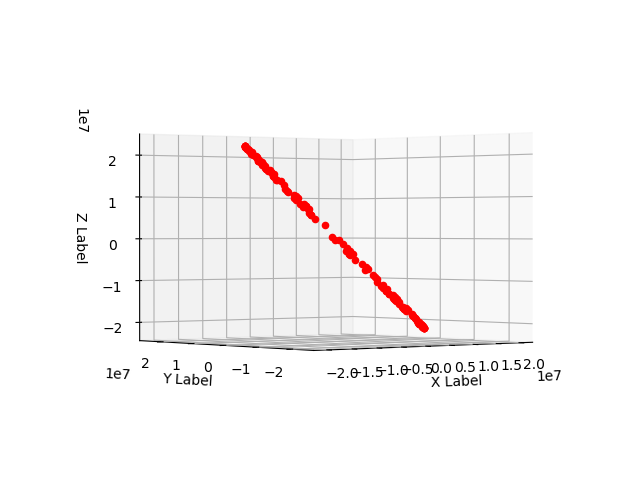

In [119]:
#print(a)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(df)):
    a=xyz[i][0]
    b=xyz[i][1]
    c=xyz[i][2]
    ax.scatter(a,b,c, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
    #print(mp.sqrt((xyz[i][0]-a)**2+(xyz[i][1]-b)**2+(xyz[i][2]-c)**2))
    #print(str(a)+" "+str(b)+" "+str(c))

In [44]:
import matplotlib.pyplot as plt
plt.scatter(xyz[:,2],xyz[:,1])
plt.show()

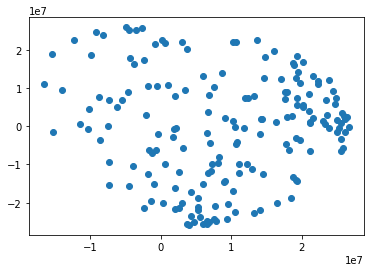

In [45]:
plt.scatter(xyz[:,0],xyz[:,1])
plt.show()

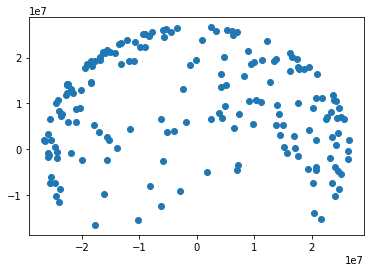

In [46]:
plt.scatter(xyz[:,2],xyz[:,0])
plt.show()

In [47]:
len(df)

177

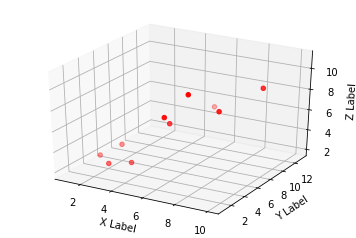